### Test notebook

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import torch_geometric
from torch_geometric.nn import GCNConv
import IPython
from IPython.display import display, HTML

from graphUtils import add_edges
from generator import generate_organism
from cell import Cell
from organism import Organism
from GNCAmodel import GNCA
from visualizer import Visualizer

In [2]:
visualizer = Visualizer()
n = 10
organism = generate_organism(n)
graph = organism.toGraph()

In [3]:
device = torch.device('cpu')
input_channels = 5
model = GNCA(device, input_channels)

In [4]:
graph = model(graph,1)

In [5]:
graph.x

tensor([[ 4.1791e-02,  3.2710e-02, -7.8131e-03, -9.8972e-03,  1.0000e+00],
        [ 3.2910e-02, -9.1261e-04, -6.9023e-03, -8.2720e-03,  1.0000e+00],
        [ 5.9238e-02,  8.4661e-02, -6.9035e-03, -8.9157e-03,  1.0000e+00],
        [ 4.4180e-02,  6.3628e-02, -8.0483e-03, -1.0379e-02,  1.0000e+00],
        [-9.8783e-04,  6.9250e-04, -6.5317e-03, -7.7331e-03,  1.0000e+00],
        [ 9.0796e-02,  8.3887e-02, -6.2085e-03, -8.0803e-03,  1.0000e+00],
        [ 7.6261e-02,  3.1164e-02, -6.0589e-03, -7.7852e-03,  1.0000e+00],
        [ 3.8409e-02,  8.3075e-02, -6.7063e-03, -8.5328e-03,  1.0000e+00],
        [ 7.2186e-02,  6.9230e-02, -8.0483e-03, -1.0379e-02,  1.0000e+00],
        [ 5.6647e-02,  6.8377e-02, -8.0483e-03, -1.0379e-02,  1.0000e+00]],
       grad_fn=<CopySlices>)

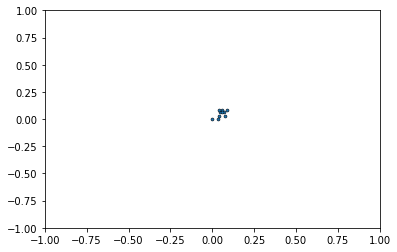

In [6]:
visualizer.plot_organism(graph.detach().cpu())

In [7]:
#visualizer.plot_organism(graph.detach().cpu())
#for i in range(100):
#    graph = model(graph,1)
#    visualizer.plot_organism(graph.detach().cpu())

In [8]:
anim = visualizer.animate_organism(graph, model)
IPython.display.HTML(anim)